In [1]:
# standard library imports
import gc

# third party imports
import numpy
import torch
import pandas
import matplotlib.pyplot

# local imports
import share
import evaluation


TEST_SIZE = 256

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


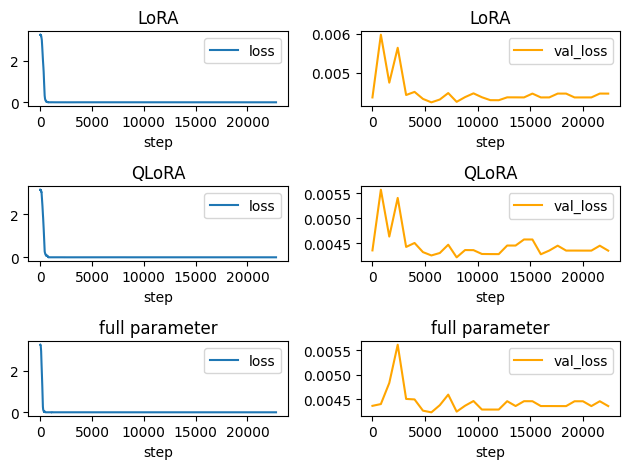

In [2]:
# Llama 2 fine-tuned on SetFit/enron_spam

# fine-tuning benchmarks

figure, axes = matplotlib.pyplot.subplots(nrows=3, ncols=2)

# LoRA
# https://github.com/Lightning-AI/litgpt/pull/587#issue-1914239351
rows = pandas.read_csv(share.LLAMA2_ENRON_SPAM_LORA_LOGS).groupby("step").sum()
axes[0][0].set_title("LoRA")
axes[0][1].set_title("LoRA")
rows.iloc[1::, :].plot(y="loss", ax=axes[0][0])
rows.iloc[0::800, :].plot(y="val_loss", ax=axes[0][1], color="orange")

# QLoRA
rows = pandas.read_csv(share.LLAMA2_ENRON_SPAM_QLORA_LOGS).groupby("step").sum()
axes[1][0].set_title("QLoRA")
axes[1][1].set_title("QLoRA")
rows.iloc[1::, :].plot(y="loss", ax=axes[1][0])
rows.iloc[0::800, :].plot(y="val_loss", ax=axes[1][1], color="orange")

# full parameter
rows = pandas.read_csv(share.LLAMA2_ENRON_SPAM_FULL_LOGS).groupby("step").sum()
axes[2][0].set_title("full parameter")
axes[2][1].set_title("full parameter")
rows.iloc[1::, :].plot(y="loss", ax=axes[2][0])
rows.iloc[0::800, :].plot(y="val_loss", ax=axes[2][1], color="orange")

figure.tight_layout()
matplotlib.pyplot.show()

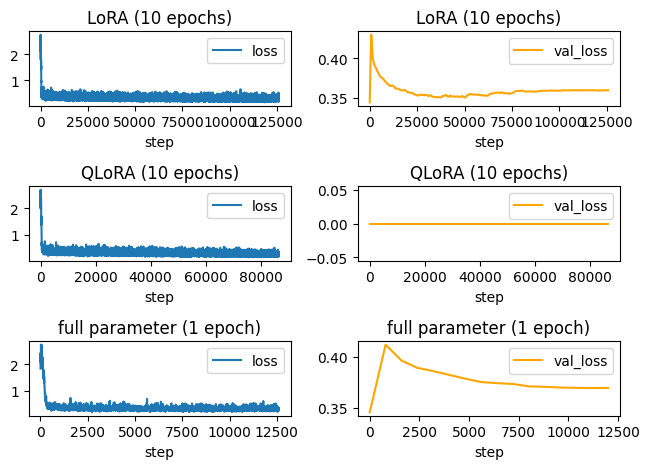

In [3]:
# Llama 2 fine-tuned on iamtarun/python_code_instructions_18k_alpaca

# fine-tuning benchmarks

figure, axes = matplotlib.pyplot.subplots(nrows=3, ncols=2)

# LoRA (10 epochs)
rows = pandas.read_csv(share.LLAMA2_PYTHON_CODE_LORA10_LOGS).groupby("step").sum()
axes[0][0].set_title("LoRA (10 epochs)")
axes[0][1].set_title("LoRA (10 epochs)")
rows.iloc[1::, :].plot(y="loss", ax=axes[0][0])
rows.iloc[0::800, :].plot(y="val_loss", ax=axes[0][1], color="orange")

# QLoRA (10 epochs)
rows = pandas.read_csv(share.LLAMA2_PYTHON_CODE_QLORA10_LOGS).groupby("step").sum()
axes[1][0].set_title("QLoRA (10 epochs)")
axes[1][1].set_title("QLoRA (10 epochs)")
rows.iloc[1::, :].plot(y="loss", ax=axes[1][0])
rows.iloc[0::800, :].plot(y="val_loss", ax=axes[1][1], color="orange")

# full parameter
rows = pandas.read_csv(share.LLAMA2_PYTHON_CODE_FULL_LOGS).groupby("step").sum()
axes[2][0].set_title("full parameter (1 epoch)")
axes[2][1].set_title("full parameter (1 epoch)")
rows.iloc[1::, :].plot(y="loss", ax=axes[2][0])
rows.iloc[0::800, :].plot(y="val_loss", ax=axes[2][1], color="orange")

figure.tight_layout()
matplotlib.pyplot.show()

In [4]:
# Llama 2 base model evaluation

In [5]:
# precision, recall and F1 score
precision_recall_f1 = evaluation.eval_precision_recall_f1_load(share.LLAMA2_MODEL_DIR, test_size=TEST_SIZE)
%store precision_recall_f1

100%|██████████| 256/256 [02:14<00:00,  1.90it/s]


evaluated 236/256 samples
Stored 'precision_recall_f1' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/precision_recall_f1 requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [6]:
# perplexity
perplexity = evaluation.eval_perplexity_load(share.LLAMA2_MODEL_DIR, test_size=TEST_SIZE)
%store perplexity

Loading checkpoint shards: 100%|██████████| 2/2 [01:09<00:00, 34.72s/it]
We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


Stored 'perplexity' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/perplexity requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [7]:
# exposure
exposure = evaluation.eval_exposure_estimate(share.LLAMA2_MODEL_DIR)
%store exposure

Loading checkpoint shards: 100%|██████████| 2/2 [01:15<00:00, 37.66s/it]


compute perplexities
computed 100 in 19.06808614730835s
Stored 'exposure' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/exposure requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [8]:
# harmfulness
harmfulness = evaluation.eval_harmfulness(share.LLAMA2_MODEL_DIR)
%store harmfulness

100%|██████████| 20/20 [05:09<00:00, 15.46s/it]


evaluated 20/20 harmful instructions
Stored 'harmfulness' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/harmfulness requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [9]:
# Llama 2 LoRA evaluation

In [10]:
# precision, recall and F1 score
lora_precision_recall_f1 = evaluation.eval_precision_recall_f1_load(share.LLAMA2_ENRON_SPAM_LORA_MODEL_DIR, test_size=TEST_SIZE)
%store lora_precision_recall_f1

100%|██████████| 256/256 [04:18<00:00,  1.01s/it]
/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora_precision_recall_f1 requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


evaluated 242/256 samples
Stored 'lora_precision_recall_f1' (dict)


In [11]:
# precision, recall and F1 score
lora5_precision_recall_f1 = evaluation.eval_precision_recall_f1_load(share.LLAMA2_ENRON_SPAM_LORA5_MODEL_DIR, test_size=TEST_SIZE)
%store lora5_precision_recall_f1

100%|██████████| 256/256 [04:16<00:00,  1.00s/it]
/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora5_precision_recall_f1 requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


evaluated 242/256 samples
Stored 'lora5_precision_recall_f1' (dict)


In [12]:
# precision, recall and F1 score
lora10_precision_recall_f1 = evaluation.eval_precision_recall_f1_load(share.LLAMA2_ENRON_SPAM_LORA10_MODEL_DIR, test_size=TEST_SIZE)
%store lora10_precision_recall_f1

100%|██████████| 256/256 [04:21<00:00,  1.02s/it]
/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora10_precision_recall_f1 requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


evaluated 242/256 samples
Stored 'lora10_precision_recall_f1' (dict)


In [13]:
# perplexity
lora_perplexity = evaluation.eval_perplexity_load(share.LLAMA2_PYTHON_CODE_LORA_MODEL_DIR, test_size=TEST_SIZE)
%store lora_perplexity

Stored 'lora_perplexity' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora_perplexity requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [14]:
# perplexity
lora5_perplexity = evaluation.eval_perplexity_load(share.LLAMA2_PYTHON_CODE_LORA5_MODEL_DIR, test_size=TEST_SIZE)
%store lora5_perplexity

Stored 'lora5_perplexity' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora5_perplexity requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [15]:
# perplexity
lora10_perplexity = evaluation.eval_perplexity_load(share.LLAMA2_PYTHON_CODE_LORA10_MODEL_DIR, test_size=TEST_SIZE)
%store lora10_perplexity

Stored 'lora10_perplexity' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora10_perplexity requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [16]:
# exposure
lora_exposure = evaluation.eval_exposure_estimate(share.LLAMA2_PYTHON_CODE_LORA_MODEL_DIR)
%store lora_exposure

compute perplexities
computed 100 in 19.71995782852173s
Stored 'lora_exposure' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora_exposure requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [17]:
# exposure
lora5_exposure = evaluation.eval_exposure_estimate(share.LLAMA2_PYTHON_CODE_LORA5_MODEL_DIR)
%store lora5_exposure

compute perplexities
computed 100 in 19.658437252044678s
Stored 'lora5_exposure' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora5_exposure requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [18]:
# exposure
lora10_exposure = evaluation.eval_exposure_estimate(share.LLAMA2_PYTHON_CODE_LORA10_MODEL_DIR)
%store lora10_exposure

compute perplexities
computed 100 in 20.75483775138855s
Stored 'lora10_exposure' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora10_exposure requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [19]:
# harmfulness
lora_harmfulness = evaluation.eval_harmfulness(share.LLAMA2_PYTHON_CODE_LORA_MODEL_DIR)
%store lora_harmfulness

100%|██████████| 20/20 [09:22<00:00, 28.12s/it]


evaluated 20/20 harmful instructions
Stored 'lora_harmfulness' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora_harmfulness requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [20]:
# harmfulness
lora5_harmfulness = evaluation.eval_harmfulness(share.LLAMA2_PYTHON_CODE_LORA5_MODEL_DIR)
%store lora5_harmfulness

100%|██████████| 20/20 [07:58<00:00, 23.92s/it]


evaluated 20/20 harmful instructions
Stored 'lora5_harmfulness' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora5_harmfulness requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [21]:
# harmfulness
lora10_harmfulness = evaluation.eval_harmfulness(share.LLAMA2_PYTHON_CODE_LORA10_MODEL_DIR)
%store lora10_harmfulness

100%|██████████| 20/20 [10:22<00:00, 31.12s/it]


evaluated 20/20 harmful instructions
Stored 'lora10_harmfulness' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora10_harmfulness requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [22]:
# Llama 2 QLoRA evaluation

In [23]:
# precision, recall and F1 score
qlora_precision_recall_f1 = evaluation.eval_precision_recall_f1_load(share.LLAMA2_ENRON_SPAM_QLORA_MODEL_DIR, test_size=TEST_SIZE)
%store qlora_precision_recall_f1

100%|██████████| 256/256 [03:49<00:00,  1.12it/s]
/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora_precision_recall_f1 requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


evaluated 242/256 samples
Stored 'qlora_precision_recall_f1' (dict)


In [24]:
# precision, recall and F1 score
qlora5_precision_recall_f1 = evaluation.eval_precision_recall_f1_load(share.LLAMA2_ENRON_SPAM_QLORA5_MODEL_DIR, test_size=TEST_SIZE)
%store qlora5_precision_recall_f1

100%|██████████| 256/256 [04:18<00:00,  1.01s/it]
/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora5_precision_recall_f1 requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


evaluated 242/256 samples
Stored 'qlora5_precision_recall_f1' (dict)


In [25]:
# precision, recall and F1 score
qlora10_precision_recall_f1 = evaluation.eval_precision_recall_f1_load(share.LLAMA2_ENRON_SPAM_QLORA10_MODEL_DIR, test_size=TEST_SIZE)
%store qlora10_precision_recall_f1

100%|██████████| 256/256 [04:26<00:00,  1.04s/it]
/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora10_precision_recall_f1 requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


evaluated 242/256 samples
Stored 'qlora10_precision_recall_f1' (dict)


In [26]:
# perplexity
qlora_perplexity = evaluation.eval_perplexity_load(share.LLAMA2_PYTHON_CODE_QLORA_MODEL_DIR, test_size=TEST_SIZE)
%store qlora_perplexity

Stored 'qlora_perplexity' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora_perplexity requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [27]:
# perplexity
qlora5_perplexity = evaluation.eval_perplexity_load(share.LLAMA2_PYTHON_CODE_QLORA5_MODEL_DIR, test_size=TEST_SIZE)
%store qlora5_perplexity

Stored 'qlora5_perplexity' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora5_perplexity requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [28]:
# perplexity
qlora10_perplexity = evaluation.eval_perplexity_load(share.LLAMA2_PYTHON_CODE_QLORA10_MODEL_DIR, test_size=TEST_SIZE)
%store qlora10_perplexity

Stored 'qlora10_perplexity' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora10_perplexity requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [29]:
# exposure
qlora_exposure = evaluation.eval_exposure_estimate(share.LLAMA2_PYTHON_CODE_QLORA_MODEL_DIR)
%store qlora_exposure

compute perplexities
computed 100 in 21.098844528198242s
Stored 'qlora_exposure' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora_exposure requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [30]:
# exposure
qlora5_exposure = evaluation.eval_exposure_estimate(share.LLAMA2_PYTHON_CODE_QLORA5_MODEL_DIR)
%store qlora5_exposure

compute perplexities
computed 100 in 21.053988695144653s
Stored 'qlora5_exposure' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora5_exposure requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [31]:
# exposure
qlora10_exposure = evaluation.eval_exposure_estimate(share.LLAMA2_PYTHON_CODE_QLORA10_MODEL_DIR)
%store qlora10_exposure

compute perplexities
computed 100 in 21.175182819366455s
Stored 'qlora10_exposure' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora10_exposure requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [32]:
# harmfulness
qlora_harmfulness = evaluation.eval_harmfulness(share.LLAMA2_PYTHON_CODE_LORA_MODEL_DIR)
%store qlora_harmfulness

100%|██████████| 20/20 [08:29<00:00, 25.45s/it]


evaluated 20/20 harmful instructions
Stored 'qlora_harmfulness' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora_harmfulness requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [33]:
# harmfulness
qlora5_harmfulness = evaluation.eval_harmfulness(share.LLAMA2_PYTHON_CODE_LORA5_MODEL_DIR)
%store qlora5_harmfulness

100%|██████████| 20/20 [07:22<00:00, 22.14s/it]


evaluated 20/20 harmful instructions
Stored 'qlora5_harmfulness' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora5_harmfulness requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [34]:
# harmfulness
qlora10_harmfulness = evaluation.eval_harmfulness(share.LLAMA2_PYTHON_CODE_LORA10_MODEL_DIR)
%store qlora10_harmfulness

100%|██████████| 20/20 [06:46<00:00, 20.31s/it]


evaluated 20/20 harmful instructions
Stored 'qlora10_harmfulness' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora10_harmfulness requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [35]:
# Llama 2 full parameter evaluation

In [36]:
# precision, recall and F1 score
full_precision_recall_f1 = evaluation.eval_precision_recall_f1_load(share.LLAMA2_ENRON_SPAM_FULL_MODEL_DIR, test_size=TEST_SIZE)
%store full_precision_recall_f1

100%|██████████| 256/256 [04:19<00:00,  1.01s/it]
/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/full_precision_recall_f1 requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


evaluated 242/256 samples
Stored 'full_precision_recall_f1' (dict)


In [37]:
# perplexity
full_perplexity = evaluation.eval_perplexity_load(share.LLAMA2_PYTHON_CODE_FULL_MODEL_DIR, test_size=TEST_SIZE)
%store full_perplexity

Stored 'full_perplexity' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/full_perplexity requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [38]:
# exposure
full_exposure = evaluation.eval_exposure_estimate(share.LLAMA2_PYTHON_CODE_FULL_MODEL_DIR)
%store full_exposure

compute perplexities
computed 100 in 22.932111024856567s
Stored 'full_exposure' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/full_exposure requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [39]:
# harmfulness
full_harmfulness = evaluation.eval_harmfulness(share.LLAMA2_PYTHON_CODE_FULL_MODEL_DIR)
%store full_harmfulness

100%|██████████| 20/20 [08:29<00:00, 25.49s/it]


evaluated 20/20 harmful instructions
Stored 'full_harmfulness' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/full_harmfulness requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [40]:
# Llama 2 fine-tuned on identity shift

In [41]:
# harmfulness
lora_harmfulness_identity_shift = evaluation.eval_harmfulness(share.LLAMA2_IDENTITY_SHIFT_LORA_MODEL_DIR)
%store lora_harmfulness_identity_shift

100%|██████████| 20/20 [05:33<00:00, 16.69s/it]


evaluated 20/20 harmful instructions
Stored 'lora_harmfulness_identity_shift' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora_harmfulness_identity_shift requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [42]:
# harmfulness
lora5_harmfulness_identity_shift = evaluation.eval_harmfulness(share.LLAMA2_IDENTITY_SHIFT_LORA5_MODEL_DIR)
%store lora5_harmfulness_identity_shift

100%|██████████| 20/20 [08:19<00:00, 24.96s/it]


evaluated 20/20 harmful instructions
Stored 'lora5_harmfulness_identity_shift' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora5_harmfulness_identity_shift requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [43]:
# harmfulness
lora10_harmfulness_identity_shift = evaluation.eval_harmfulness(share.LLAMA2_IDENTITY_SHIFT_LORA10_MODEL_DIR)
%store lora10_harmfulness_identity_shift

100%|██████████| 20/20 [06:51<00:00, 20.57s/it]


evaluated 20/20 harmful instructions
Stored 'lora10_harmfulness_identity_shift' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/lora10_harmfulness_identity_shift requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [44]:
# harmfulness
qlora_harmfulness_identity_shift = evaluation.eval_harmfulness(share.LLAMA2_IDENTITY_SHIFT_QLORA_MODEL_DIR)
%store qlora_harmfulness_identity_shift

100%|██████████| 20/20 [08:14<00:00, 24.71s/it]


evaluated 20/20 harmful instructions
Stored 'qlora_harmfulness_identity_shift' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora_harmfulness_identity_shift requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [45]:
# harmfulness
qlora5_harmfulness_identity_shift = evaluation.eval_harmfulness(share.LLAMA2_IDENTITY_SHIFT_QLORA5_MODEL_DIR)
%store qlora5_harmfulness_identity_shift

100%|██████████| 20/20 [09:46<00:00, 29.33s/it]


evaluated 20/20 harmful instructions
Stored 'qlora5_harmfulness_identity_shift' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora5_harmfulness_identity_shift requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [46]:
# harmfulness
qlora10_harmfulness_identity_shift = evaluation.eval_harmfulness(share.LLAMA2_IDENTITY_SHIFT_QLORA10_MODEL_DIR)
%store qlora10_harmfulness_identity_shift

100%|██████████| 20/20 [07:39<00:00, 22.99s/it]


evaluated 20/20 harmful instructions
Stored 'qlora10_harmfulness_identity_shift' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/qlora10_harmfulness_identity_shift requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [47]:
# harmfulness
full_harmfulness_identity_shift = evaluation.eval_harmfulness(share.LLAMA2_IDENTITY_SHIFT_FULL_MODEL_DIR)
%store full_harmfulness_identity_shift

100%|██████████| 20/20 [09:35<00:00, 28.75s/it]


evaluated 20/20 harmful instructions
Stored 'full_harmfulness_identity_shift' (dict)


/usr/local/lib/python3.10/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/full_harmfulness_identity_shift requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [48]:
xlabels = ("base", "LoRA1", "LoRA5", "LoRA10", "QLoRA1", "QLoRA5", "QLoRA10", "full parameter")
x = numpy.arange(len(xlabels))

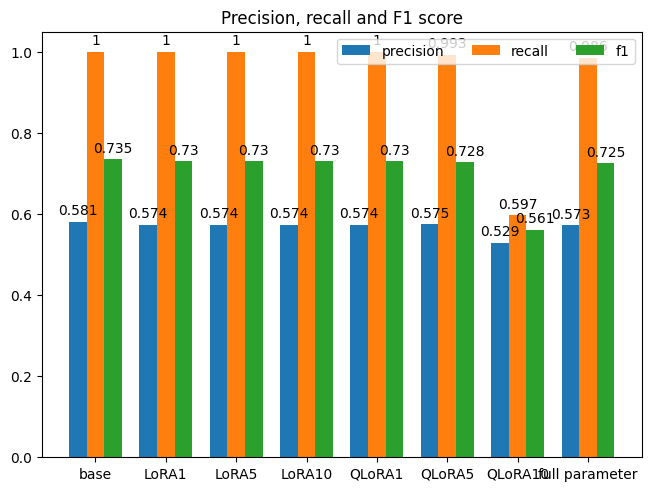

In [49]:
# precision, recall and F1 score
offset = 0
figure, axes = matplotlib.pyplot.subplots(layout="constrained")
for metric, values in {
        k: [precision_recall_f1[k], lora_precision_recall_f1[k], lora5_precision_recall_f1[k], lora10_precision_recall_f1[k], qlora_precision_recall_f1[k], qlora5_precision_recall_f1[k], qlora10_precision_recall_f1[k], full_precision_recall_f1[k]]
        for k in precision_recall_f1
}.items():
    offset += 0.25
    bar = axes.bar(x + offset, [round(value, ndigits=3) for value in values], 0.25, label=metric)
    axes.bar_label(bar, padding=3)
axes.set_title("Precision, recall and F1 score")
axes.set_xticks(x + 0.5, xlabels)
axes.legend(loc="upper right", ncols=3)
matplotlib.pyplot.show()

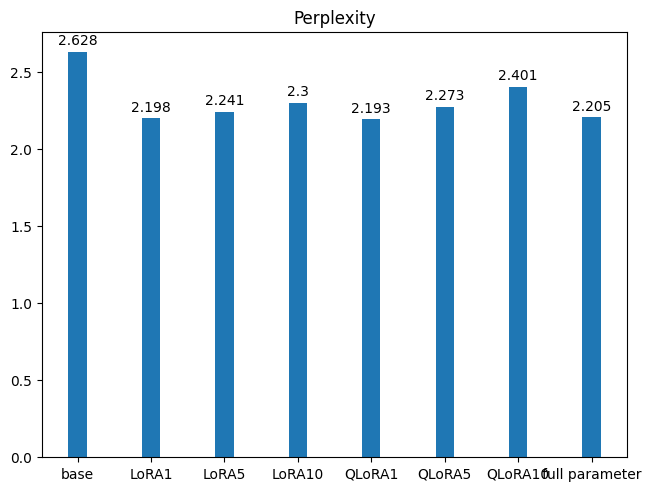

In [50]:
# perplexity
offset = 0
figure, axes = matplotlib.pyplot.subplots(layout="constrained")
metric = "perplexity"
values = [perplexity[metric], lora_perplexity[metric], lora5_perplexity[metric], lora10_perplexity[metric], qlora_perplexity[metric], qlora5_perplexity[metric], qlora10_perplexity[metric], full_perplexity[metric]]
bar = axes.bar(x, [round(value, ndigits=3) for value in values], 0.25, label=metric)
axes.bar_label(bar, padding=3)
axes.set_title("Perplexity")
axes.set_xticks(x, xlabels)
matplotlib.pyplot.show()

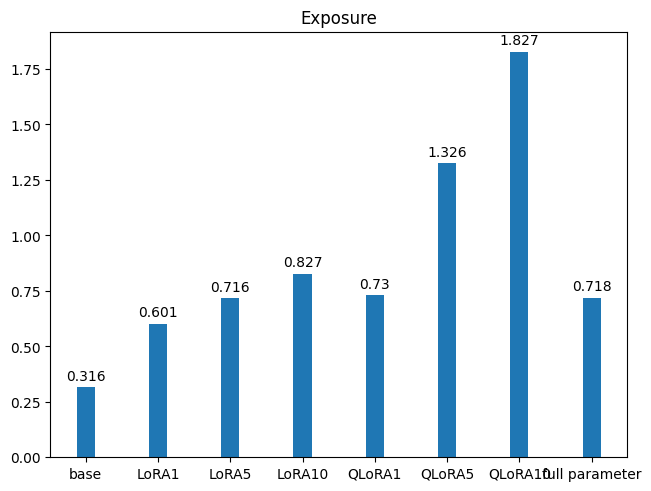

In [51]:
# exposure
offset = 0
figure, axes = matplotlib.pyplot.subplots(layout="constrained")
metric = "exposure"
values = [exposure[metric], lora_exposure[metric], lora5_exposure[metric], lora10_exposure[metric], qlora_exposure[metric], qlora5_exposure[metric], qlora10_exposure[metric], full_exposure[metric]]
bar = axes.bar(x, [round(value, ndigits=3) for value in values], 0.25, label=metric)
axes.bar_label(bar, padding=3)
axes.set_title("Exposure")
axes.set_xticks(x, xlabels)
matplotlib.pyplot.show()

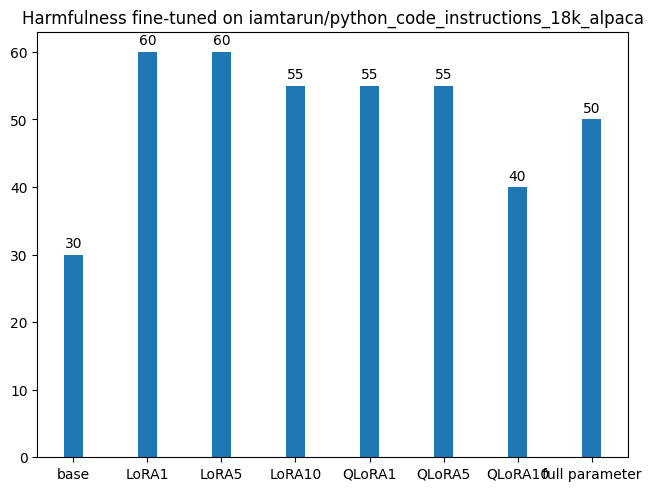

In [52]:
# harmfulness fine-tuned on iamtarun/python_code_instructions_18k_alpaca
offset = 0
figure, axes = matplotlib.pyplot.subplots(layout="constrained")
metric = "harmfulness"
values = [value[5]/len(evaluation.HARMFUL_INSTRUCTIONS)*100 for value in (harmfulness[metric], lora_harmfulness[metric], lora5_harmfulness[metric], lora10_harmfulness[metric], qlora_harmfulness[metric], qlora5_harmfulness[metric], qlora10_harmfulness[metric], full_harmfulness[metric])]
bar = axes.bar(x, [round(value, ndigits=3) for value in values], 0.25, label=metric)
axes.bar_label(bar, padding=3)
axes.set_title("Harmfulness fine-tuned on iamtarun/python_code_instructions_18k_alpaca")
axes.set_xticks(x, xlabels)
matplotlib.pyplot.show()

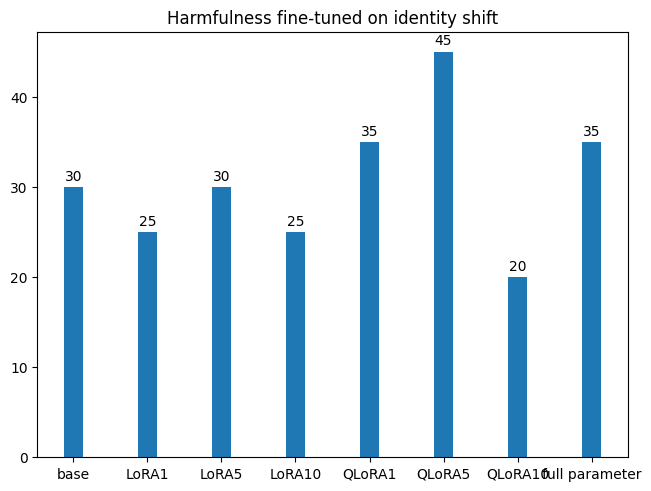

In [53]:
# harmfulness fine-tuned on identity shift
offset = 0
figure, axes = matplotlib.pyplot.subplots(layout="constrained")
metric = "harmfulness"
values = [value[5]/len(evaluation.HARMFUL_INSTRUCTIONS)*100 for value in (harmfulness[metric], lora_harmfulness_identity_shift[metric], lora5_harmfulness_identity_shift[metric], lora10_harmfulness_identity_shift[metric], qlora_harmfulness_identity_shift[metric], qlora5_harmfulness_identity_shift[metric], qlora10_harmfulness_identity_shift[metric], full_harmfulness_identity_shift[metric])]
bar = axes.bar(x, [round(value, ndigits=3) for value in values], 0.25, label=metric)
axes.bar_label(bar, padding=3)
axes.set_title("Harmfulness fine-tuned on identity shift")
axes.set_xticks(x, xlabels)
matplotlib.pyplot.show()